<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/Decision_Tree_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score,classification_report
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling

In [0]:
#print many statements at the same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
df=pd.DataFrame(iris)
df.head()
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
#understand the distribution of species 
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [0]:
eda_report = pandas_profiling.ProfileReport(df)

In [23]:
eda_report 

Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,6.0 KiB
Average record size in memory,40.9 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [0]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

#Seperating dependent and independent variables

In [25]:
#Seperating dependent and independent variables
x=df.drop('species',axis=1)
y=df['species']
x.head(5)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: species, dtype: int8

In [27]:
# importing the  package for Decision Tree Classier
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(max_depth=4)
my_tree_one

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
#Split the data into the training and test datasets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=42,stratify = y)
train_x.shape
train_y.shape
test_x.shape 
test_y.shape  

(112, 4)

(112,)

(38, 4)

(38,)

In [29]:
x.head()
y.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int8

In [0]:
#Fit the model instant on the training data using
my_tree_one = my_tree_one.fit(train_x,train_y)


In [0]:
#Predict using the model instant and training done on the training data using ‘ .predict() ‘ method 
predict_test = my_tree_one.predict(test_x)

In [33]:
metrics = accuracy_score(predict_test, test_y)
metrics 

0.8947368421052632

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
print(confusion_matrix(test_y,predict_test))



[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]


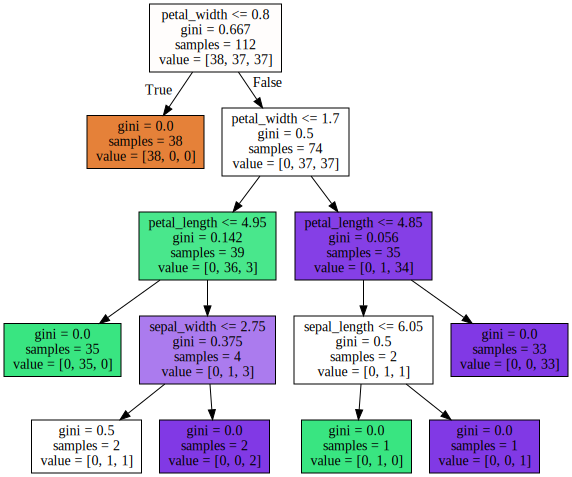

In [32]:
#Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file = dotfile, feature_names = x.columns,
                        filled=True)
    dotfile.close()
    
from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

In [0]:
print(cf)
lbl1 = ["P1","P2","P3"]
lbl2 = ["T1","T2","T3"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();


print(Confusion Matrix(predict_test,test_y))